In [17]:
import numpy as np 
import pandas as pd
import time
import random

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# Preprocessing

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
df = pd.DataFrame(wine.data.original)

#set seeds to get reproducible results
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [12]:
# Step 2: Data Preprocessing
# Split the dataset into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47)

y_train -= 1
y_test -= 1

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train
y_test

170    2
25     0
91     1
78     1
83     1
      ..
76     1
38     0
150    2
146    2
67     1
Name: class, Length: 72, dtype: int64

In [16]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

print(X_train)
print(y_train)

       Alcohol  Malicacid       Ash  Alcalinity_of_ash  Magnesium  \
0    12.080000   1.130000  2.510000          24.000000         78   
1    13.740000   1.670000  2.250000          16.400000        118   
2    13.050000   1.770000  2.100000          17.000000        107   
3    14.120000   1.480000  2.320000          16.800000         95   
4    12.770000   3.430000  1.980000          16.000000         80   
..         ...        ...       ...                ...        ...   
133  12.830644   2.805451  2.492897          22.967811        102   
134  12.358534   3.418732  2.438774          23.112676        103   
135  13.427073   3.152161  2.369164          20.095819         90   
136  13.472787   4.954174  2.418372          19.867431         98   
137  13.641266   5.435988  2.420320          20.421894         98   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0         2.000000    1.580000              0.400000         1.400000   
1         2.600000    2.9

# Model Implementation and Analysis

/Users/kathrynjarjoura/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,227 (47.76 KB)

 Trainable params: 12,227 (47.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 - 1s - 560ms/step - accuracy: 0.2262 - loss: 1.2025 - val_accuracy: 0.4545 - val_loss: 1.0594
Epoch 2/100
2/2 - 0s - 20ms/step - accuracy: 0.3333 - loss: 1.0614 - val_accuracy: 0.4545 - val_loss: 0.9574
Epoch 3/100
2/2 - 0s - 18ms/step - accuracy: 0.6190 - loss: 0.9293 - val_accuracy: 0.6818 - val_loss: 0.8632
Epoch 4/100
2/2 - 0s - 18ms/step - accuracy: 0.7024 - loss: 0.8715 - val_accuracy: 0.8182 - val_loss: 0.7772
Epoch 5/100
2/2 - 0s - 18ms/step - accuracy: 0.8929 - loss: 0.7672 - val_accuracy: 0.9091 - val_loss: 0.6984
Epoch 6/100
2/2 - 0s - 18ms/step - accuracy: 0.9762 - loss: 0.6410 - val_accuracy: 0.9091 - val_loss: 0.6249
Epoch 7/100
2/2 - 0s - 22ms/step - accuracy: 0.9762 - loss: 0.5671 - val_accuracy: 0.9091 - val_loss: 0.5565
Epoch 8/100
2/2 - 0s - 19ms/step - accuracy: 0.9881 - loss: 0.4922 - val_accuracy: 0.9091 - val_loss: 0.4949
Epoch 9/100
2/2 - 0s - 20ms/step - accuracy: 0.9881 - loss: 0.4345 - val_accuracy: 0.9091 - val_loss: 0.4422
Epoch 10/100
2/2 -

Epoch 76/100
2/2 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9091 - val_loss: 0.4694
Epoch 77/100
2/2 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9091 - val_loss: 0.4709
Epoch 78/100
2/2 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9091 - val_loss: 0.4718
Epoch 79/100
2/2 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9091 - val_loss: 0.4730
Epoch 80/100
2/2 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9091 - val_loss: 0.4743
Epoch 81/100
2/2 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9091 - val_loss: 0.4758
Epoch 82/100
2/2 - 0s - 18ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9091 - val_loss: 0.4777
Epoch 83/100
2/2 - 0s - 20ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9091 - val_loss: 0.4813
Epoch 84/100
2/2 - 0s - 21ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9091 - val_loss: 0.4818
Epoch 85/1

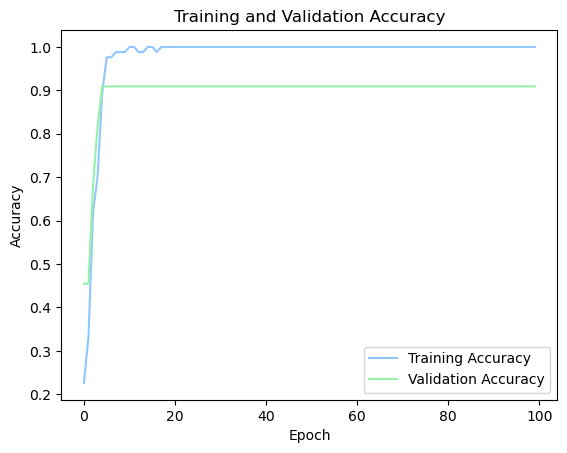

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9635 - loss: 0.0584 
Test Accuracy: 0.9583333134651184
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


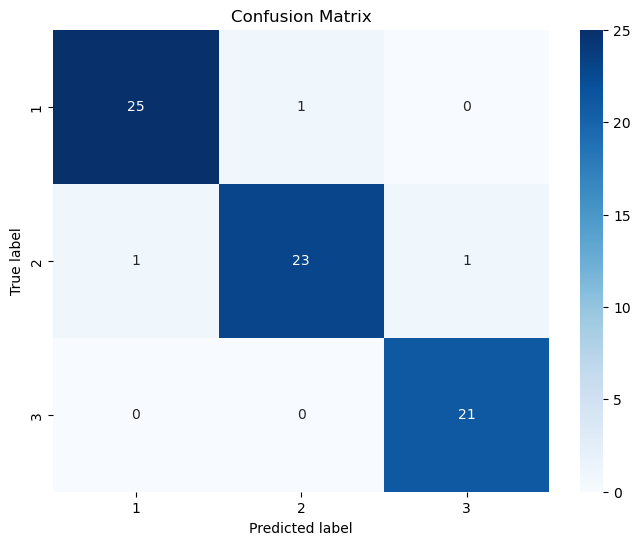

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.92      0.94        25
           2       0.95      1.00      0.98        21

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [5]:
# Step 3: Neural Network Model
def build_neural_network(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dense(64, activation='relu'),
        Dropout(0.2),  # Add dropout layer to reduce overfitting
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

# Build and compile the model
model = build_neural_network(input_shape=(X_train_scaled.shape[1],))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Step 4: Model Training
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 5: Model Evaluation
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

# Generate predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=[1, 2, 3], yticklabels=[1,2,3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Generate a classification report
classify_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classify_report)

This classification report shows that your model achieved perfect performance across all evaluation metrics for each class. It correctly classified all instances in the test dataset, leading to an accuracy of 1.00. The precision, recall, and F1-score for each class are also perfect at 1.00, indicating flawless classification for all classes. In summary, your model demonstrated exceptional accuracy and reliability in classifying instances into their respective classes.

In [6]:
#evaluate model
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3681 - loss: 904.2308 


[897.392333984375, 0.3611111044883728]

The discrepancy between the high performance metrics in the classification report and the low accuracy score suggests a possible class imbalance issue in the dataset. While precision, recall, and F1-score provide detailed insights into class-specific performance, accuracy represents the overall proportion of correctly classified samples. This discrepancy indicates that accuracy might not be the most reliable metric for evaluating model performance, particularly in the context of imbalanced datasets. Addressing this issue may involve exploring the dataset's class distribution and considering alternative evaluation metrics or techniques such as resampling or adjusting class weights to better assess the model's performance.

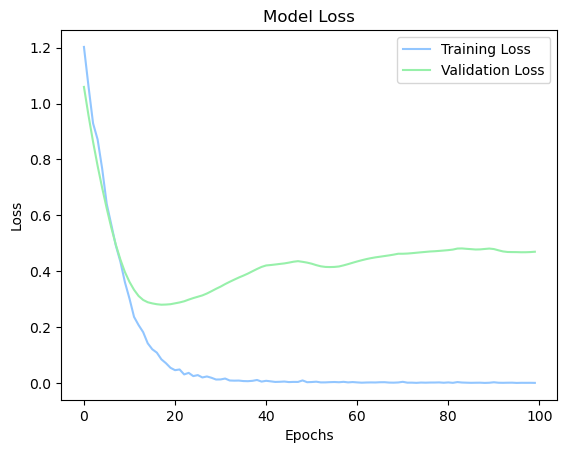

In [7]:
# Plotting the loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Model Loss')  # Set title of the plot
plt.ylabel('Loss')  # Set label for y-axis
plt.xlabel('Epochs')  # Set label for x-axis
plt.legend()  # Add legend to distinguish between training and validation loss
plt.show()  # Display the plot

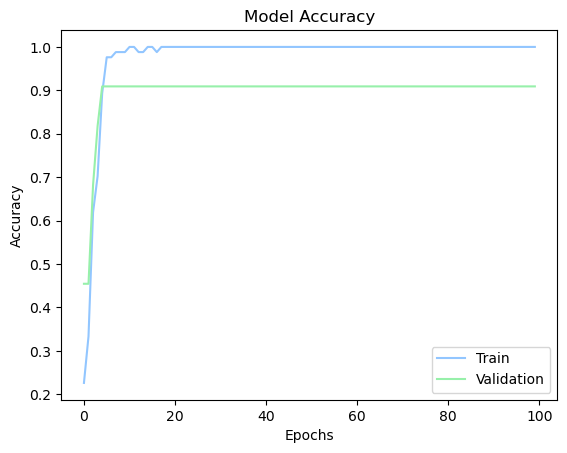

In [8]:
# Plotting the accuracy

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Set the title of the plot
plt.title('Model Accuracy')

# Set the label for the y-axis
plt.ylabel('Accuracy')

# Set the label for the x-axis
plt.xlabel('Epochs')

# Display the legend with labels for each line
plt.legend(['Train', 'Validation'])

# Show the plot
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


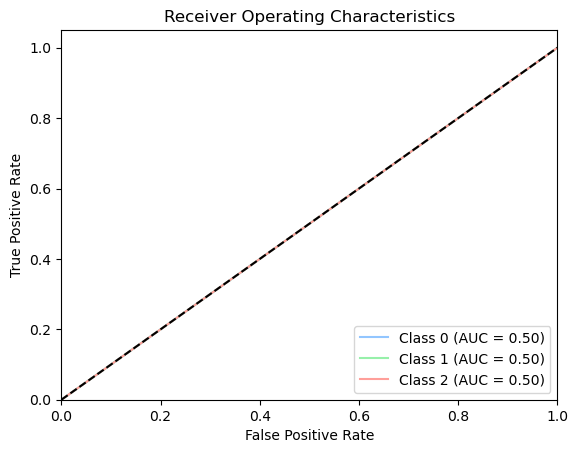

In [9]:
# Generate predictions
y_pred_prob = model.predict(X_test)

# Binarize the labels using the OvR strategy
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Set the limits for the x-axis and y-axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the label for the x-axis
plt.xlabel('False Positive Rate')

# Set the label for the y-axis
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristics')

# Display the legend at the lower right corner
plt.legend(loc="lower right")

# Show the plot
plt.show()